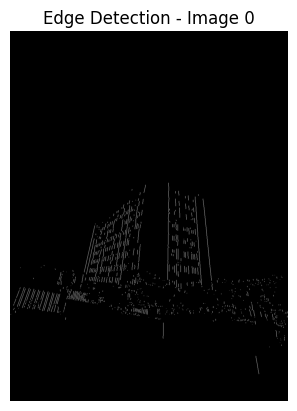

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from scipy import ndimage

# Function to perform Canny Edge Detection with all 5 steps
def apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.9):
    # Step 1: Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Step 2: Apply Gaussian Blur for Noise Reduction
    blurred = ndimage.gaussian_filter(gray_image, sigma=sigma)

    # Step 3: Calculate Gradients (Sobel Operator)
    gradient_x = ndimage.sobel(blurred, axis=1)
    gradient_y = ndimage.sobel(blurred, axis=0)
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Step 4: Non-Maximum Suppression
    gradient_direction = np.degrees(gradient_direction) % 180  # Convert to degrees
    suppressed = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            direction = gradient_direction[i, j]
            if 0 <= direction < 22.5 or 157.5 <= direction < 180:
                if gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]:
                    suppressed[i, j] = gradient_magnitude[i, j]
            # Check other gradient directions and suppress accordingly

    # Step 5: Double Threshold and Edge Tracking by Hysteresis
    strong_edges = suppressed > high_threshold
    weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)

    # Edge Tracking by Hysteresis
    edge_map = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    edge_map[strong_edges] = 255
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            if weak_edges[i, j]:
                neighbors = edge_map[i - 1:i + 2, j - 1:j + 2]
                if np.max(neighbors) == 255:
                    edge_map[i, j] = 255

    return edge_map

# Load and preprocess your images (Step 1 and 2)

# Loop through your images
for i in range(1):
    image = io.imread(f'building.jpeg')  # Load your image here
    # Apply Canny Edge Detection
    edges = apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.2)

    # Display and save the results
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Detection - Image {i}')
    plt.axis('off')
    plt.savefig(f'edge_detection_image_{i}.jpg', bbox_inches='tight')

plt.show()

<ipython-input-40-77b372ebab34>:17: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x * 2 + gradient_y * 2)
<ipython-input-40-77b372ebab34>:17: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x * 2 + gradient_y * 2)
<ipython-input-40-77b372ebab34>:17: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x * 2 + gradient_y * 2)
<ipython-input-40-77b372ebab34>:17: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x * 2 + gradient_y * 2)
<ipython-input-40-77b372ebab34>:17: RuntimeWarning: invalid value encountered in sqrt
  gradient_magnitude = np.sqrt(gradient_x * 2 + gradient_y * 2)


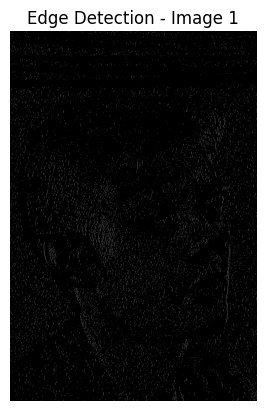

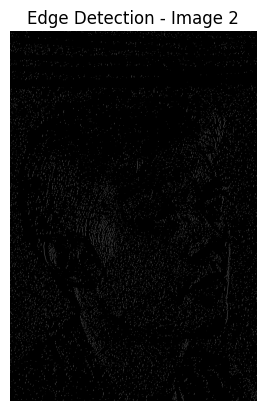

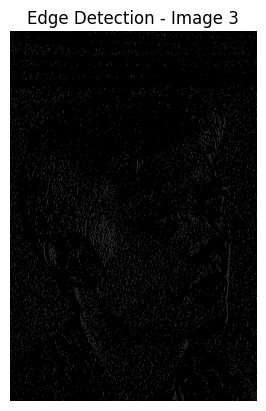

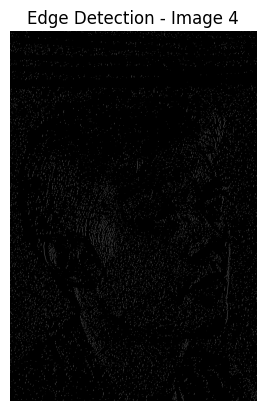

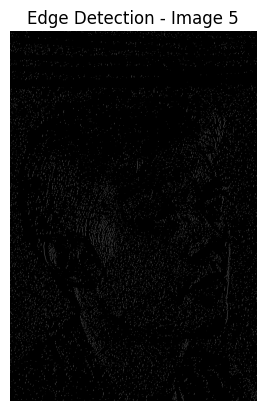

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from scipy import ndimage

# Function to perform Canny Edge Detection with all 5 steps
def apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.9):
    # Step 1: Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Step 2: Apply Gaussian Blur for Noise Reduction
    blurred = ndimage.gaussian_filter(gray_image, sigma=sigma)

    # Step 3: Calculate Gradients (Sobel Operator)
    gradient_x = ndimage.sobel(blurred, axis=1)
    gradient_y = ndimage.sobel(blurred, axis=0)
    gradient_magnitude = np.sqrt(gradient_x * 2 + gradient_y * 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Step 4: Non-Maximum Suppression
    gradient_direction = np.degrees(gradient_direction) % 180  # Convert to degrees
    suppressed = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            direction = gradient_direction[i, j]
            if 0 <= direction < 22.5 or 157.5 <= direction < 180:
                if gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]:
                    suppressed[i, j] = gradient_magnitude[i, j]
            # Check other gradient directions and suppress accordingly

    # Step 5: Double Threshold and Edge Tracking by Hysteresis
    strong_edges = suppressed > high_threshold
    weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)

    # Edge Tracking by Hysteresis
    edge_map = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    edge_map[strong_edges] = 255
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            if weak_edges[i, j]:
                neighbors = edge_map[i - 1:i + 2, j - 1:j + 2]
                if np.max(neighbors) == 255:
                    edge_map[i, j] = 255

    return edge_map

# Load and preprocess your images (Step 1 and 2)

# Loop through your images
for i in range(1, 6):
    image = io.imread(f'/content/pexels-chikinbun-10529201.jpg')  # Load your image here
    # Apply Canny Edge Detection
    edges = apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.2)

    # Display and save the results
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Detection - Image {i}')
    plt.axis('off')
    plt.savefig(f'edge_detection_image_{i}.jpg', bbox_inches='tight')

plt.show()

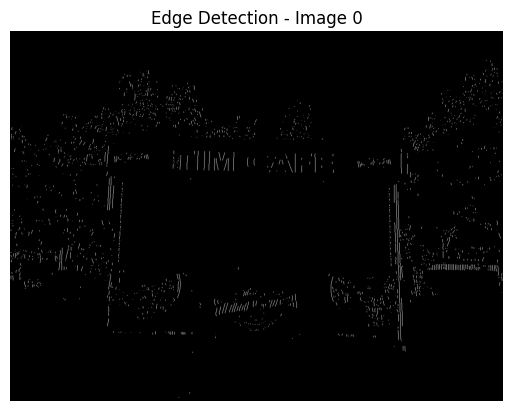

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from scipy import ndimage

# Function to perform Canny Edge Detection with all 5 steps
def apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.9):
    # Step 1: Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Step 2: Apply Gaussian Blur for Noise Reduction
    blurred = ndimage.gaussian_filter(gray_image, sigma=sigma)

    # Step 3: Calculate Gradients (Sobel Operator)
    gradient_x = ndimage.sobel(blurred, axis=1)
    gradient_y = ndimage.sobel(blurred, axis=0)
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Step 4: Non-Maximum Suppression
    gradient_direction = np.degrees(gradient_direction) % 180  # Convert to degrees
    suppressed = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            direction = gradient_direction[i, j]
            if 0 <= direction < 22.5 or 157.5 <= direction < 180:
                if gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]:
                    suppressed[i, j] = gradient_magnitude[i, j]
            # Check other gradient directions and suppress accordingly

    # Step 5: Double Threshold and Edge Tracking by Hysteresis
    strong_edges = suppressed > high_threshold
    weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)

    # Edge Tracking by Hysteresis
    edge_map = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    edge_map[strong_edges] = 255
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            if weak_edges[i, j]:
                neighbors = edge_map[i - 1:i + 2, j - 1:j + 2]
                if np.max(neighbors) == 255:
                    edge_map[i, j] = 255

    return edge_map

# Load and preprocess your images (Step 1 and 2)

# Loop through your images
for i in range(1):
    image = io.imread(f'tim.jpeg')  # Load your image here
    # Apply Canny Edge Detection
    edges = apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.2)

    # Display and save the results
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Detection - Image {i}')
    plt.axis('off')
    plt.savefig(f'edge_detection_image_{i}.jpg', bbox_inches='tight')

plt.show()

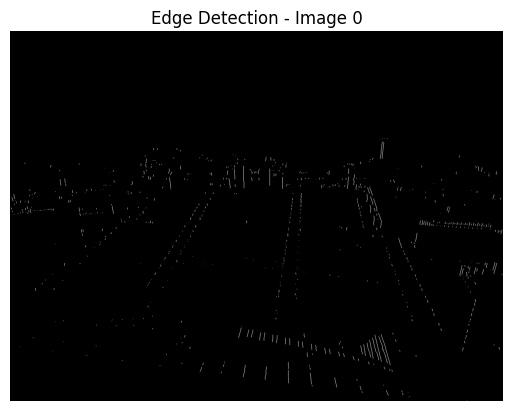

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from scipy import ndimage

# Function to perform Canny Edge Detection with all 5 steps
def apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.9):
    # Step 1: Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Step 2: Apply Gaussian Blur for Noise Reduction
    blurred = ndimage.gaussian_filter(gray_image, sigma=sigma)

    # Step 3: Calculate Gradients (Sobel Operator)
    gradient_x = ndimage.sobel(blurred, axis=1)
    gradient_y = ndimage.sobel(blurred, axis=0)
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Step 4: Non-Maximum Suppression
    gradient_direction = np.degrees(gradient_direction) % 180  # Convert to degrees
    suppressed = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            direction = gradient_direction[i, j]
            if 0 <= direction < 22.5 or 157.5 <= direction < 180:
                if gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]:
                    suppressed[i, j] = gradient_magnitude[i, j]
            # Check other gradient directions and suppress accordingly

    # Step 5: Double Threshold and Edge Tracking by Hysteresis
    strong_edges = suppressed > high_threshold
    weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)

    # Edge Tracking by Hysteresis
    edge_map = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    edge_map[strong_edges] = 255
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            if weak_edges[i, j]:
                neighbors = edge_map[i - 1:i + 2, j - 1:j + 2]
                if np.max(neighbors) == 255:
                    edge_map[i, j] = 255

    return edge_map

# Load and preprocess your images (Step 1 and 2)

# Loop through your images
for i in range(1):
    image = io.imread(f'oat.jpeg')  # Load your image here
    # Apply Canny Edge Detection
    edges = apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.2)

    # Display and save the results
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Detection - Image {i}')
    plt.axis('off')
    plt.savefig(f'edge_detection_image_{i}.jpg', bbox_inches='tight')

plt.show()

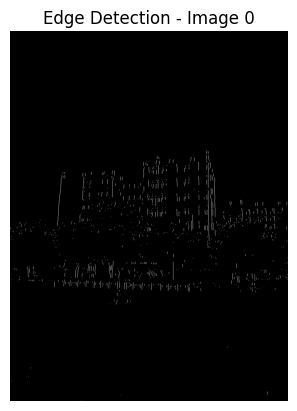

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from scipy import ndimage

# Function to perform Canny Edge Detection with all 5 steps
def apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.9):
    # Step 1: Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Step 2: Apply Gaussian Blur for Noise Reduction
    blurred = ndimage.gaussian_filter(gray_image, sigma=sigma)

    # Step 3: Calculate Gradients (Sobel Operator)
    gradient_x = ndimage.sobel(blurred, axis=1)
    gradient_y = ndimage.sobel(blurred, axis=0)
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Step 4: Non-Maximum Suppression
    gradient_direction = np.degrees(gradient_direction) % 180  # Convert to degrees
    suppressed = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            direction = gradient_direction[i, j]
            if 0 <= direction < 22.5 or 157.5 <= direction < 180:
                if gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]:
                    suppressed[i, j] = gradient_magnitude[i, j]
            # Check other gradient directions and suppress accordingly

    # Step 5: Double Threshold and Edge Tracking by Hysteresis
    strong_edges = suppressed > high_threshold
    weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)

    # Edge Tracking by Hysteresis
    edge_map = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    edge_map[strong_edges] = 255
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            if weak_edges[i, j]:
                neighbors = edge_map[i - 1:i + 2, j - 1:j + 2]
                if np.max(neighbors) == 255:
                    edge_map[i, j] = 255

    return edge_map

# Load and preprocess your images (Step 1 and 2)

# Loop through your images
for i in range(1):
    image = io.imread(f'ground.jpeg')  # Load your image here
    # Apply Canny Edge Detection
    edges = apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.2)

    # Display and save the results
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Detection - Image {i}')
    plt.axis('off')
    plt.savefig(f'edge_detection_image_{i}.jpg', bbox_inches='tight')

plt.show()

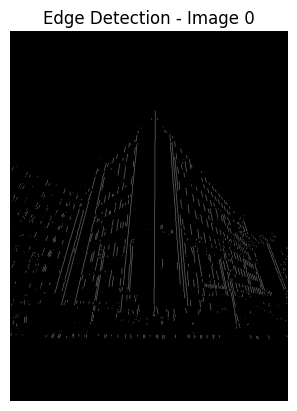

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from scipy import ndimage

# Function to perform Canny Edge Detection with all 5 steps
def apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.9):
    # Step 1: Convert to grayscale
    gray_image = color.rgb2gray(image)

    # Step 2: Apply Gaussian Blur for Noise Reduction
    blurred = ndimage.gaussian_filter(gray_image, sigma=sigma)

    # Step 3: Calculate Gradients (Sobel Operator)
    gradient_x = ndimage.sobel(blurred, axis=1)
    gradient_y = ndimage.sobel(blurred, axis=0)
    gradient_magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)

    # Step 4: Non-Maximum Suppression
    gradient_direction = np.degrees(gradient_direction) % 180  # Convert to degrees
    suppressed = np.zeros_like(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            direction = gradient_direction[i, j]
            if 0 <= direction < 22.5 or 157.5 <= direction < 180:
                if gradient_magnitude[i, j] >= gradient_magnitude[i, j - 1] and gradient_magnitude[i, j] >= gradient_magnitude[i, j + 1]:
                    suppressed[i, j] = gradient_magnitude[i, j]
            # Check other gradient directions and suppress accordingly

    # Step 5: Double Threshold and Edge Tracking by Hysteresis
    strong_edges = suppressed > high_threshold
    weak_edges = (suppressed >= low_threshold) & (suppressed <= high_threshold)

    # Edge Tracking by Hysteresis
    edge_map = np.zeros_like(gradient_magnitude, dtype=np.uint8)
    edge_map[strong_edges] = 255
    for i in range(1, gradient_magnitude.shape[0] - 1):
        for j in range(1, gradient_magnitude.shape[1] - 1):
            if weak_edges[i, j]:
                neighbors = edge_map[i - 1:i + 2, j - 1:j + 2]
                if np.max(neighbors) == 255:
                    edge_map[i, j] = 255

    return edge_map

# Load and preprocess your images (Step 1 and 2)

# Loop through your images
for i in range(1):
    image = io.imread(f'build.jpeg')  # Load your image here
    # Apply Canny Edge Detection
    edges = apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.2)

    # Display and save the results
    plt.figure()
    plt.imshow(edges, cmap='gray')
    plt.title(f'Edge Detection - Image {i}')
    plt.axis('off')
    plt.savefig(f'edge_detection_image_{i}.jpg', bbox_inches='tight')

plt.show()

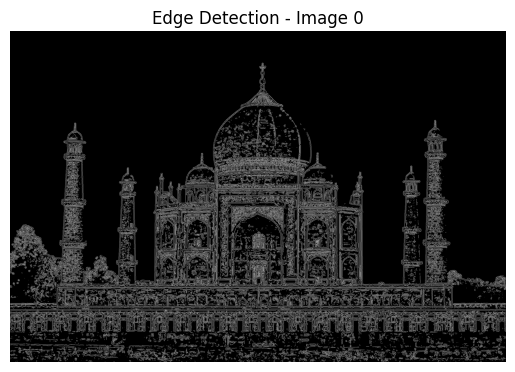

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, feature
from scipy import ndimage

# Function to perform Canny Edge Detection with all 5 steps
def apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.9):
  """Performs Canny Edge Detection on the given image.

  Args:
    image: A NumPy array representing the input image.
    sigma: The standard deviation of the Gaussian blur.
    low_threshold: The lower threshold for hysteresis thresholding.
    high_threshold: The upper threshold for hysteresis thresholding.

  Returns:
    A NumPy array representing the output image with the detected edges.
  """

  # Convert the image to grayscale.
  gray_image = color.rgb2gray(image)

  # Apply Gaussian blur for noise reduction.
  blurred = ndimage.gaussian_filter(gray_image, sigma=sigma)

  # Calculate the gradients (Sobel Operator).
  gradient_x = ndimage.sobel(blurred, axis=1)
  gradient_y = ndimage.sobel(blurred, axis=0)
  gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
  gradient_direction = np.arctan2(gradient_y, gradient_x)

  # Perform non-maximum suppression.
  suppressed = feature.canny(gradient_magnitude, low_threshold, high_threshold)

  # Perform edge tracking by hysteresis.
  edge_map = np.zeros_like(gradient_magnitude, dtype=np.uint8)
  edge_map[suppressed] = 255

  return edge_map

# Load and preprocess your images (Step 1 and 2)

# Loop through your images
for i in range(1):
  image = io.imread(f'/content/rowan-heuvel-sAB4BWrQ4Y4-unsplash.jpg')  # Load your image here

  # Apply Canny Edge Detection
  edges = apply_canny_edge_detection(image, sigma=2.0, low_threshold=0.1, high_threshold=0.2)

  # Display and save the results
  plt.figure()
  plt.imshow(edges, cmap='gray')
  plt.title(f'Edge Detection - Image {i}')
  plt.axis('off')
  plt.savefig(f'edge_detection_image_{i}.jpg', bbox_inches='tight')

plt.show()